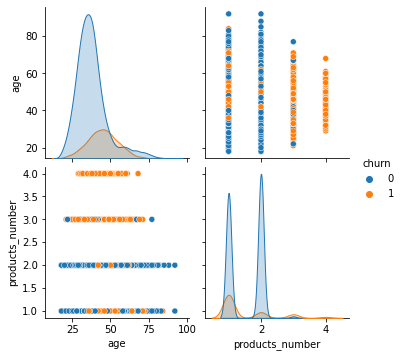

In [303]:
# Decision Tree Classification
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Importing the dataset
dataset = pd.read_csv('Bank_Customer.csv')

sns.pairplot(data=dataset, hue = 'churn', vars = ["age", "products_number"])
plt.show()

In [304]:
dataset

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [305]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_le = pd.DataFrame(dataset)
data_le['country'] = labelencoder.fit_transform(data_le['country'])
dataset['gender'] = labelencoder.fit_transform(data_le['gender'])
data_le
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# X = dataset.iloc[:, 1:-1] #splitting the one hot encoded data into features and label
# y = dataset.iloc[:, -1]
# column_transformer = make_column_transformer((OneHotEncoder(), ['country', 'gender']), remainder = 'passthrough')
# X = column_transformer.fit_transform(X)
# X = pd.DataFrame(data=data_le, columns=column_transformer.get_feature_names())
# X


In [350]:
# X = data_le.iloc[:, 1:-1] #splitting the one hot encoded data into features and label
y = data_le.iloc[:, -1]
X = data_le.iloc[:, [4, 7, 9]]

In [351]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100, stratify = y)

In [352]:
X
# Germany: 2509
# France: 5014
# Spain: 2477
X_train


,age,products_number,active_member
4285,40,1,0
7923,38,1,1
9188,28,2,1
9466,52,1,0
4892,51,1,0
...,...,...,...
1507,43,1,0
7026,27,2,1
8910,48,1,0
5325,43,1,1


In [353]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 100)
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

classifier = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

classifier.fit(X_train, y_train)
print(classifier.best_params_)
# classifier.fit(X_train, y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'splitter': 'best'}


In [355]:
# classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=8, max_features=0.8, splitter = 'best')
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=6, max_features='sqrt', splitter = 'best')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='sqrt')

In [356]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1940   51]
 [ 324  185]]


In [357]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1991
           1       0.78      0.36      0.50       509

    accuracy                           0.85      2500
   macro avg       0.82      0.67      0.70      2500
weighted avg       0.84      0.85      0.83      2500



In [358]:
from sklearn import metrics
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
X_test
# y_pred

0.85


,age,products_number,active_member
7412,36,2,1
5712,35,1,0
7511,38,1,0
8628,44,2,1
5291,32,1,1
...,...,...,...
4984,31,2,1
5069,29,2,1
4665,35,2,0
4003,26,2,1


In [359]:
classifier.feature_importances_

array([0.4549904 , 0.46096552, 0.08404408])

Accuracy: 85.0%
|--- products_number <= 2.50
|   |--- active_member <= 0.50
|   |   |--- products_number <= 1.50
|   |   |   |--- age <= 41.50
|   |   |   |   |--- age <= 38.50
|   |   |   |   |   |--- age <= 19.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  19.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  38.50
|   |   |   |   |   |--- age <= 39.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  39.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- age >  41.50
|   |   |   |   |--- age <= 49.50
|   |   |   |   |   |--- age <= 44.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  44.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  49.50
|   |   |   |   |   |--- age <= 70.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  70.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- products_number >  1.50
|   |   |   |--- age <= 50.50
|   |   |   |   

[Text(0.625, 0.9285714285714286, 'country <= 2.5\nentropy = 0.729\nsamples = 100.0%\nvalue = [0.796, 0.204]\nclass = 1'),
 Text(0.36363636363636365, 0.7857142857142857, 'gender <= 0.5\nentropy = 0.683\nsamples = 96.8%\nvalue = [0.819, 0.181]\nclass = 1'),
 Text(0.18181818181818182, 0.6428571428571429, 'country <= 1.5\nentropy = 0.805\nsamples = 46.6%\nvalue = [0.754, 0.246]\nclass = 1'),
 Text(0.09090909090909091, 0.5, 'credit_score <= 41.5\nentropy = 0.954\nsamples = 25.2%\nvalue = [0.625, 0.375]\nclass = 1'),
 Text(0.045454545454545456, 0.35714285714285715, 'credit_score <= 38.5\nentropy = 0.716\nsamples = 15.9%\nvalue = [0.803, 0.197]\nclass = 1'),
 Text(0.022727272727272728, 0.21428571428571427, 'credit_score <= 19.5\nentropy = 0.656\nsamples = 12.6%\nvalue = [0.831, 0.169]\nclass = 1'),
 Text(0.011363636363636364, 0.07142857142857142, 'entropy = 0.0\nsamples = 0.1%\nvalue = [1.0, 0.0]\nclass = 1'),
 Text(0.03409090909090909, 0.07142857142857142, 'entropy = 0.658\nsamples = 12.5%\n

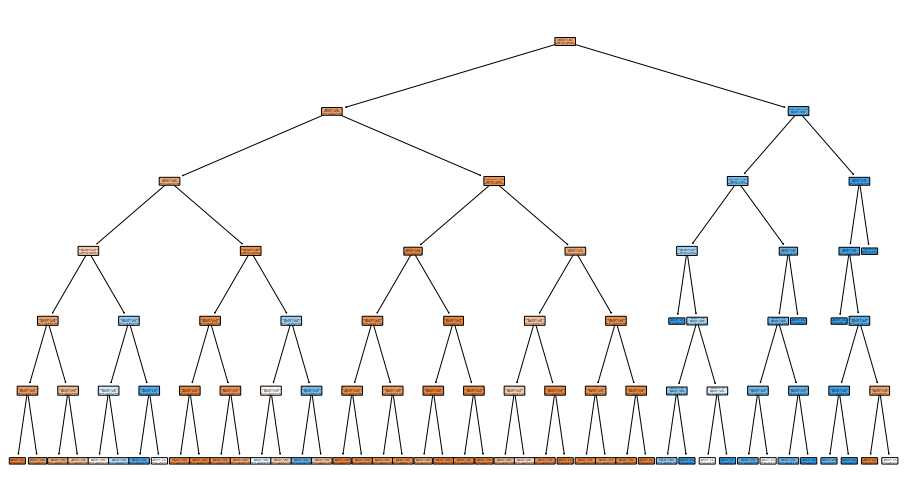

In [361]:
dataset['churn'] = dataset['churn'].astype('str')
feature_names = np.array(dataset.columns.tolist()[1:-1])  # 取出特徵名稱
class_names = dataset.churn.unique() # 取出標籤/分類名稱

predict = classifier.predict(X_test)
test_score = classifier.score(X_test, y_test) * 100
# 印出預測精確率
print(f'Accuracy: {test_score:.1f}%')
# 印出文字版的決策樹
# print(export_text(classifier, feature_names = list(feature_names)))
print(export_text(classifier, feature_names = ['age', 'products_number', 'active_member']))
# 繪製決策樹
plt.figure(figsize=(16, 9))
plot_tree(classifier,  # 填滿顏色, 開啟圓角, 顯示百分比
          filled=True, rounded=True, proportion=True,
          feature_names=feature_names,
          class_names=class_names)
# plt.savefig('tree.jpg')  # 寫入到檔案

Accuracy: 84.9%
|--- age <= 44.50
|   |--- products_number <= 2.50
|   |   |--- products_number <= 1.50
|   |   |   |--- class: 0
|   |   |--- products_number >  1.50
|   |   |   |--- class: 0
|   |--- products_number >  2.50
|   |   |--- balance <= 57003.37
|   |   |   |--- class: 1
|   |   |--- balance >  57003.37
|   |   |   |--- class: 1
|--- age >  44.50
|   |--- active_member <= 0.50
|   |   |--- age <= 51.50
|   |   |   |--- class: 1
|   |   |--- age >  51.50
|   |   |   |--- class: 1
|   |--- active_member >  0.50
|   |   |--- products_number <= 2.50
|   |   |   |--- class: 0
|   |   |--- products_number >  2.50
|   |   |   |--- class: 1



[Text(0.5, 0.875, 'age <= 44.5\ngini = 0.327\nsamples = 100.0%\nvalue = [0.794, 0.206]\nclass = 1'),
 Text(0.25, 0.625, 'products_number <= 2.5\ngini = 0.228\nsamples = 76.6%\nvalue = [0.869, 0.131]\nclass = 1'),
 Text(0.125, 0.375, 'products_number <= 1.5\ngini = 0.204\nsamples = 74.8%\nvalue = [0.885, 0.115]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.3\nsamples = 36.9%\nvalue = [0.816, 0.184]\nclass = 1'),
 Text(0.1875, 0.125, 'gini = 0.093\nsamples = 37.9%\nvalue = [0.951, 0.049]\nclass = 1'),
 Text(0.375, 0.375, 'balance <= 57003.365\ngini = 0.315\nsamples = 1.8%\nvalue = [0.196, 0.804]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.477\nsamples = 0.7%\nvalue = [0.393, 0.607]\nclass = 0'),
 Text(0.4375, 0.125, 'gini = 0.128\nsamples = 1.1%\nvalue = [0.069, 0.931]\nclass = 0'),
 Text(0.75, 0.625, 'active_member <= 0.5\ngini = 0.495\nsamples = 23.4%\nvalue = [0.552, 0.448]\nclass = 1'),
 Text(0.625, 0.375, 'age <= 51.5\ngini = 0.44\nsamples = 10.0%\nvalue = [0.327, 0.673]\nclass = 0'

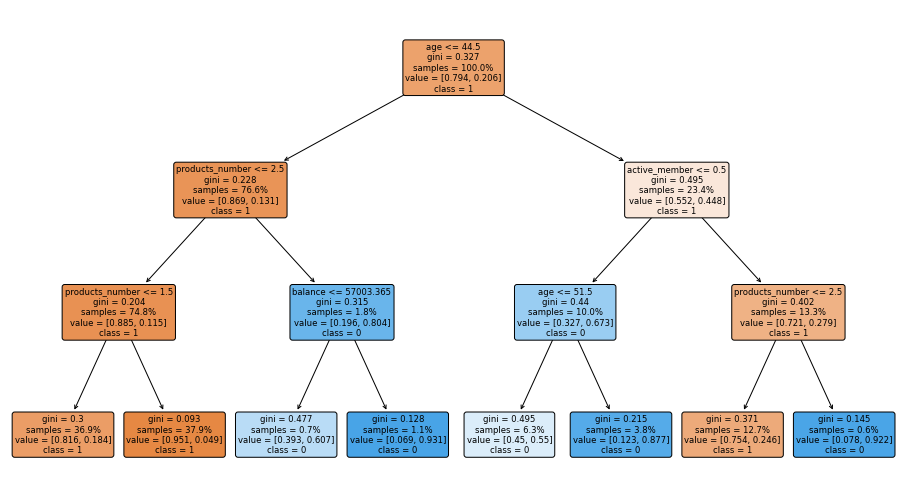

In [155]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv('Bank_Customer.csv')
dataset['churn'] = dataset['churn'].astype('str')
labelencoder = LabelEncoder()
dataset['country'] = labelencoder.fit_transform(dataset['country'])
dataset['gender'] = labelencoder.fit_transform(dataset['gender'])

X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]

feature_names = np.array(dataset.columns.tolist()[1:-1])  # 取出特徵名稱
class_names = dataset.churn.unique() # 取出標籤/分類名稱

dx_train, dx_test, dy_train, dy_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立決策樹 (3 層) 並預測結果
model = DecisionTreeClassifier(max_depth = 3)
model.fit(dx_train, dy_train)
predict = model.predict(dx_test)
test_score = model.score(dx_test, dy_test) * 100
# 印出預測精確率
print(f'Accuracy: {test_score:.1f}%')
# 印出文字版的決策樹
print(export_text(model, feature_names = list(feature_names)))
# 繪製決策樹
plt.figure(figsize=(16, 9))
plot_tree(model,  # 填滿顏色, 開啟圓角, 顯示百分比
          filled=True, rounded=True, proportion=True,
          feature_names=feature_names,
          class_names=class_names)
# plt.savefig('tree.jpg')  # 寫入到檔案

In [139]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.462755  , 0.        ,
       0.01009039, 0.32601146, 0.        , 0.20114315, 0.        ])

In [377]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [378]:
decision_tree_result = cross_validation(classifier, X_train, y_train, 10)
print(decision_tree_result)

C:\Users\Landis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Landis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Landis\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\Landis\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Landis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\Landis\anaconda3\lib\site-packages\sklearn\metrics\_classification.p

C:\Users\Landis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Landis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Landis\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\Landis\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Landis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\Landis\anaconda3\lib\site-packages\sklearn\metrics\_classification.p

{'Training Accuracy scores': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'Mean Training Accuracy': nan, 'Training Precision scores': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'Mean Training Precision': nan, 'Training Recall scores': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'Mean Training Recall': nan, 'Training F1 scores': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'Mean Training F1 Score': nan, 'Validation Accuracy scores': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'Mean Validation Accuracy': nan, 'Validation Precision scores': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'Mean Validation Precision': nan, 'Validation Recall scores': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'Mean Validation Recall': nan, 'Validation F1 scores': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'Mean Validation F1 Score': nan}


C:\Users\Landis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Landis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Landis\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\Landis\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Landis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1769, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\Landis\anaconda3\lib\site-packages\sklearn\metrics\_classification.p

In [366]:
X_train.shape[0]

7500